<a href="https://colab.research.google.com/github/Dkepffl/2022-1-ESAA/blob/main/Assignment/Assignment0404_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 결과를 셀 아래 inline으로 표시
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

## 06 사이킷런으로 수행하는 타이타닉 생존자 예측
___


#### | 타이타닉 탑승자 데이터
___
- Passengerid : 탑승자 데이터 일련번호
- Survived : 생존 여부(0 = 사망, 1 = 생존)
- Pclass : 티켓의 선실 등급(1 = 일등석, 2 =  이등석, 3 = 삼등석)
- Name : 탑승자 이름
- Sex : 탑승자 성별
- Age : 탑승자 나이
- SibSp : 같이 탑승한 형제자매 또는 배우자 인원수
- Parch : 같이 탑승한 부모님 또는 어린이 인원수
- Ticket : 티켓번호
- Fare : 요금
- Cabin : 선실 번호
- Embarked : 중간 정착 항구(C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
# import data
titanic_df = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/DataSet/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
# Column의 데이터 타입 확인하기
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


#### | 타이타닉 데이터에서 Column의 데이터 타입
___
- RangeIndex : DataFrame 인덱스의 범위를 나타내기 때문에 전체 Row 수를 알 수 있다. 타이타닉 데이터의 경우, 891 entries로 891개의 Row로 구성되어 있다. 
- Data columns (total 12 columns) : 타이타닉 데이터의 Column 수는 12개이다.
- float64 type : 2개
- int64 type : 5개
- object type : 5개(판다스의 object 자료형은 string 형처럼 생각해도 된다.)
- Non-Null Count : Null 값이 아닌 값들의 개수
 * Age : 891 - 714 = 177개의 Null 값
 * Cabin : 891 - 204 = 608개의 Null 값
 * Embarked : 891 - 889 = 2개의 Null 값

#### | 결측치(Null값) 처리하기
___
- DataFrame의 `fillna()`함수를 사용해 Null 값을 간단하게 평균 또는 고정값으로 변경할 수 있다.
  * Age의 경우 평균 나이로 변경한다.
  * 나머지 두 Column은 'N'값으로 변경한다.

In [7]:
# Null값 처리하기
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) # 평균으로 변경
titanic_df['Cabin'].fillna('N',inplace=True) # 'N'으로 변경
titanic_df['Embarked'].fillna('N',inplace=True) # 'N'으로 변경

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


#### | 문자열(Object) Feature 처리하기
___

In [8]:
# Feature들의 값 분류 살펴보기
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin : 'N'값이 687 건으로 가장 많으며(Null값 대신 넣은 값) 'C23 C25 C27'과 같이 여러 값이 한꺼번에 표기되어 있는 값이 있는 문제점들이 있다.
- Cabin Feature에서 중요한 것은 선실 번호 중 선실 등급을 나타내는 첫 번재 알파벳
- Why? : 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 살아날 확률이 더 높았을 것 같아서. **즉 선실 등급이 생존자 수에 영향을 미쳤을 것 같아서이다.**

In [9]:
# Cabin Feature에서 선실 등급(첫 번째 알파벳)만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


#### | 데이터 탐색(EDA)
___
Q. [예측] 어떤 유형의 승객이 생존 확률이 더 높았을까?
  1. 바다에서 사고가 날 경우 여성과 아이들, 그리고 노약자가 제일 먼저 구조 대상이다.
  2. 그다음 부자나 유명인이 다음 구조 대상이었을 것이다.
  3. 삼등실에 탄 가난한 이들 중 많은 사람들이 타이타닉 호와 운명을 함께 했을 것이다.


##### **1. 성별에 따른 생존자 수 비교**

In [10]:
# 성별과 생존자 수에 따라 groupby
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- Survieved는 Label로 결정 클래스 값에 해당한다.
- 0이면 사망, 1이면 생존
- 탑승객은 남자가 577명, 여자가 314명으로 남자가 더 많았다.
- 여자는 314명 중 생존자가 233명으로 약 74.2%가 생존했다.
- 남자는 577명 중 생존자가 109명으로 약 18.8%가 생존했다.
- 그래프를 이용해 데이터를 시각화해보자

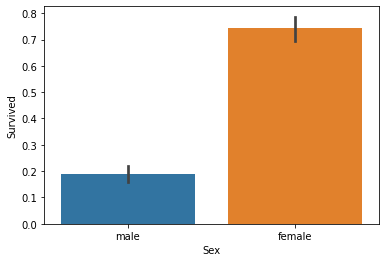

In [11]:
# 데이터 시각화 : 막대 그래프 그리기
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

##### **2. 객실 등급에 따른 생존자 수 비교**
- 객실 등급은 부를 측정할 수 있는 속성으로 적당하다.
- 따라서 객실 등급에 따른 생존자 수를 비교하여 빈부에 의해 생존 확률이 달라졌는지를 확인할 수 있다.

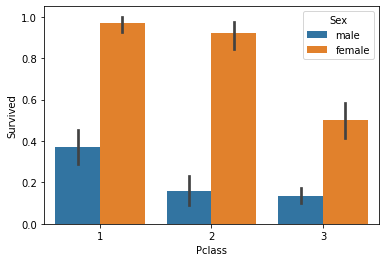

In [12]:
# 객실 등급에 따른 생존자 수 막대 그래프
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성의 경우, 일등실이나 이등실에 따른 생존 확률의 차이가 크지 않지만, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어진다.
- 남성의 경우, 일등실의 생존 확률이 다른 등급의 선실의 생존 확률보다 월등히 높다.

##### **3. 나이에 따른 생존자 수 비교**
- Age는 값의 종류가 다양하기 때문에 범위별로 분류해 Category 값을 할당한다.
  - Baby : 0 ~ 5 세
  - Child : 6 ~ 12세
  - Tennager : 13 ~ 18세
  - Student : 19 ~ 25세
  - Young Adult : 26 ~ 35세
  - Adult : 36 ~ 60세
  - Elderly : 61세 이상
- -1 이하의 오류 값은 Unknown으로 분류한다.

In [20]:
# 입력된 Age 값에 따라 Category 값을 반환하는 함수
# DataFrame의 apply lambda식에 사용. 

def get_category(age):
  cat = ''

  if age <= -1: cat = 'Unknown'
  elif age <= 5: cat = 'Baby'
  elif age <= 12: cat = 'Child'
  elif age <= 18: cat = 'Teenager'
  elif age <= 25: cat = 'Student'
  elif age <= 35: cat = 'Young Adult'
  elif age <= 60: cat = 'Adult'
  else : cat = 'Elderly'
  
  return cat

In [21]:
# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [22]:
# X축의 값을 순차적으로 표시
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

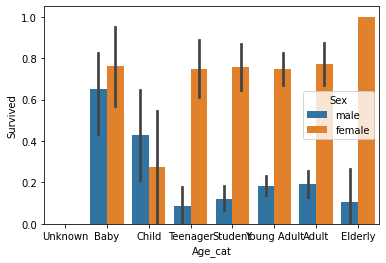

In [23]:
# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 설정
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)

# 사용 완료한 Column 삭제
titanic_df.drop('Age_cat', axis=1, inplace=True)

- 여자 Baby의 경우, 생존 확률이 비교적 높다.
- 다만 여자 Child의 경우, 다른 연령대에 비해 생존 확률이 낮다.
- 여자 Elderly의 경우, 생존 확률이 매우 높다.

##### | **데이터 탐색 결과**
- Sex, Age, Pclass 등이 생존 확률에 영향을 미치는 Feature임을 확인하였다.

#### | 문자열 Category Feature 변환하기
___
- 남아있는 문자열 Category Feature를 숫자형 Category Feature로 변환한다.
- 인코딩은 사이킷런의 `LabelEncoder` 클래스를 이용해 **Label 인코딩**을 적용한다.

In [24]:
from sklearn import preprocessing

# 한 번에 변환하기 위해 encode_features 함수 생성
def encode_features(dataDF):
  # 남아있는 문자열 Category Feature
  features = ['Cabin', 'Sex', 'Embarked'] 
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    # Label 인코딩한 값으로 변경
    dataDF[feature] = le.transform(dataDF[feature]) 
        
  return dataDF

In [26]:
# Titanic 데이터 Label 인코딩
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


#### | 데이터의 전처리를 전체적으로 호출하는 함수
___
- 지금까지 Feature를 가공한 내역을 정리하고, 이를 함수로 만들어 쉽게 재사용할 수 있도록 한다.
- 함수의 이름은 `transform_features()`로 한다.
- `transform_features()`는 Null 처리, Formatting, Encoding을 수행하는 내부 함수를 가지고 있다.

In [27]:
from sklearn.preprocessing import LabelEncoder

In [30]:
# Null 처리
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace = True)
  df['Cabin'].fillna('N',inplace = True)
  df['Embarked'].fillna('N',inplace = True)
  df['Fare'].fillna(0,inplace = True)
  return df

In [31]:
# 머신러닝 알고리즘에 불필요한 Feature 제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
  return df

In [32]:
# Label 인코딩
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

In [33]:
# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

#### | 데이터 전처리 및 학습/테스트 데이터 추출
___
- 원본 CSV 파일을 다시 로딩하고 `transform_features()` 함수를 이용해 다시 데이터 전처리를 해보도록 한다.
- Label인 Survived은 별도로 분리하여 **클래스 결정값 데이터셋(y_train)**으로 만든다.

In [34]:
# 원본 데이터를 재로딩
titanic_df = pd.read_csv('/content/drive/MyDrive/2022-1 ESAA/DataSet/titanic_train.csv')

# Feature 데이터셋과 Label 데이터셋
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

# Feature 데이터셋 데이터 전처리
X_titanic_df = transform_features(X_titanic_df)

In [35]:
# 학습 데이터와 테스트 데이터 추출
from sklearn.model_selection import train_test_split

# test 데이터의 크기를 전체의 20%로 설정
# random_state 값을 설정해 동일한 테스트 데이터가 추출되도록 설정
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

#### | 타이타닉 생존자 수 예측
___
- ML 알고리즘인 **결정 트리, 랜덤 포레스트, 로지스틱 회귀**를 이용
  1. 결정 트리 : ` DecisionTreeClassifier`
  2. 랜덤 포레스트 : `RandomForestClassifier`
  3. 로지스틱 회귀 : `LogisticRegression`
- 위의 클래스들을 이용해 앞에서 분리한 학습/테스트 데이터를 기반으로 머신러닝 모델을 **학습(fit)**하고, **예측(predict)**할 것이다.
- 예측 성능 평가는 정확도(Accuracy)로 한다. 정확도 계산을 위해 `accuracy_score` API를 사용한다.

In [37]:
# Import module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [38]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [39]:
# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [42]:
# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8547


In [44]:
# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.8492


- 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기 때문에 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없다.


#### | 교차 검증으로 결정 트리 모델 평가
___
- `model_selection` 패키지의 `KFold` 클래스, `cross_val_score()`, `GridSearchCV` 클래스를 사용할 것이다.


##### 1. KFold 클래스를 이용한 교차 검증(폴드 개수 : 5개)

In [45]:
# import Class
from sklearn.model_selection import KFold


def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores = []
    
  # KFold 교차 검증 수행. 
  for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
    # Classifier 학습, 예측, 정확도 계산 
    clf.fit(X_train, y_train) 
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
  # 5개 fold에서의 평균 정확도 계산. 
  mean_score = np.mean(scores)
  print("평균 정확도: {0:.4f}".format(mean_score)) 
  
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


##### 2. `cross_val_scor()` API를 이용한 교차 검증

In [47]:
# import API
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


 - `cross_val_scor()`는 StratifiedKFold를 이용해 폴드 세트를 분할하기 때문에, 앞서 KFold를 이용해 교차 검증의 정확도와는 차이가 있다.

##### 3. `GridSearchCV`를 이용해 하이퍼 파라미터 최적화 후 예측 성능 평가
- CV는 5개의 폴드 세트를 지정
- 하이퍼 파라미터는 `max_depth`, `min_samples_splet`, `min_samples_leaf`를 변경하면서 성능 측정
- 최적 하이퍼 파라미터와 그때의 예측 결과, 예측 정확도를 출력한다.

In [48]:
# import Class
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터
parameters = {'max_depth' : [2, 3, 5, 10], 'min_samples_split' : [2, 3, 5], 'min_samples_leaf' : [1, 5, 8]}

In [52]:
# 하이퍼 파라미터 최적화 및 학습
grid_dclf = GridSearchCV(dt_clf , param_grid = parameters , scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train , y_train)

# 최적 하이퍼 파라미터와 그때의 예측 결과 출력
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)

# 그때의 예측 정확도를 출력
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [53]:
# 최적 하이퍼 파라미터로 학습된 Estimator 추출
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
